<a href="https://colab.research.google.com/github/hatchdavid1/MX_covid_maps/blob/master/Datos_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
url = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=b23a7eb4-3a3e-4a19-bd06-83d18a002ff2&limit=50000'  
response_API = requests.get(url)
print(response_API.status_code)

200


In [2]:
data = response_API.text
dic = json.loads(data)

In [3]:
results = dic.get('result')
fields = results.get('fields')
records = results.get('records')

In [4]:
cols = [i.get('id') for i in fields]
afluencia = pd.DataFrame(records)
afluencia.tail()

,_id,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
11251,11252,2022-02-24T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11735.0,0.0,0.0,0.0
11252,11253,2022-02-25T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13820.0,0.0,0.0,0.0
11253,11254,2022-02-26T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12775.0,0.0,0.0,0.0
11254,11255,2022-02-27T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6145.0,0.0,0.0,0.0
11255,11256,2022-02-28T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11920.0,0.0,0.0,0.0


In [5]:
url_zonas = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=4f23c6c5-1b2b-410e-8589-a720d7b3db58&limit=10000'
response_api_zonas = requests.get(url_zonas)
data_zonas = response_api_zonas.text
dic_zonas = json.loads(data_zonas)
results_zonas = dic_zonas.get('result')
records_zonas = results_zonas.get('records')
zonas_riesgo = pd.DataFrame(records_zonas)
zonas_riesgo.head()

,_id,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,int2
0,1,1411,"19.4774588726,-99.214475378","{""type"": ""Polygon"", ""coordinates"": [[[-99.2139...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900200010608,Azcapotzalco,Ciudad de México,177118.764865,2461.440128,3
1,2,1414,"19.4840766322,-99.0979827502","{""type"": ""Polygon"", ""coordinates"": [[[-99.0973...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500011487,Gustavo A. Madero,Ciudad de México,137484.944478,1753.723791,5
2,3,1422,"19.5219195307,-99.1340171776","{""type"": ""Polygon"", ""coordinates"": [[[-99.1337...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500012841,Gustavo A. Madero,Ciudad de México,84091.291297,1217.219854,3
3,4,1444,"19.3139677776,-99.1267177657","{""type"": ""Polygon"", ""coordinates"": [[[-99.1249...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300010893,Coyoacán,Ciudad de México,271118.866925,2108.201526,5
4,5,1450,"19.3107975267,-99.1707434555","{""type"": ""Polygon"", ""coordinates"": [[[-99.1719...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300011567,Coyoacán,Ciudad de México,69468.042776,1072.146834,3


In [6]:
!pip install geopandas
import geopandas
from shapely.geometry import Point, Polygon
df_shp = geopandas.GeoDataFrame(zonas_riesgo)
df_shp.rename(columns = {'geo_shape':'geometry'}, inplace = True)
type(df_shp)

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 48.5 MB/s 


geopandas.geodataframe.GeoDataFrame

In [7]:
df_shp[['lat', 'long']] = df_shp['geo_point_2d'].str.split(',', 1, expand=True)
df_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           4908 non-null   int64  
 1   id            4908 non-null   int64  
 2   geo_point_2d  4908 non-null   object 
 3   geometry      4908 non-null   object 
 4   fenomeno      4908 non-null   object 
 5   taxonomia     4908 non-null   object 
 6   r_p_v_e       4908 non-null   object 
 7   intensidad    4908 non-null   object 
 8   descripcio    4908 non-null   object 
 9   fuente        4908 non-null   object 
 10  cvegeo        4908 non-null   object 
 11  alcaldia      4908 non-null   object 
 12  entidad       4908 non-null   object 
 13  area_m2       4908 non-null   float64
 14  perime_m      4908 non-null   float64
 15  int2          4908 non-null   int64  
 16  lat           4908 non-null   object 
 17  long          4908 non-null   object 
dtypes: float64(2), int64

In [8]:
# To get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


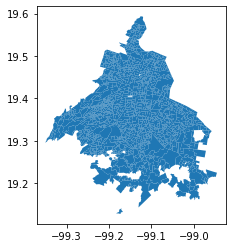

In [9]:
colonias = geopandas.read_file('/content/drive/MyDrive/Códigos_Python/Proyectos/coloniascdmx.shp', )
#colonias.crs = "epsg:4832"
colonias.plot()

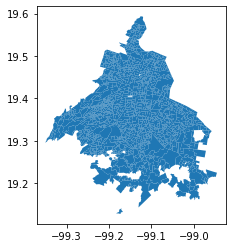

In [10]:
colonias.set_crs(epsg = 2163, inplace = True).plot()

In [11]:
crs = {'init':'EPSG:2163'}
df_shp['lat'] = df_shp['lat'].astype(float)
df_shp['long'] = df_shp['long'].astype(float)
geometry = [Point(xy) for xy in zip(df_shp['long'], df_shp['lat'])]
geo_df = geopandas.GeoDataFrame(df_shp, 
                          crs = crs, 
                          geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Puntos CDMX')

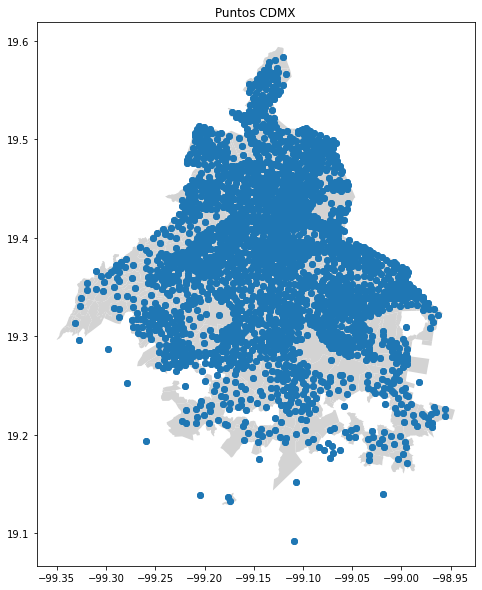

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Puntos CDMX')

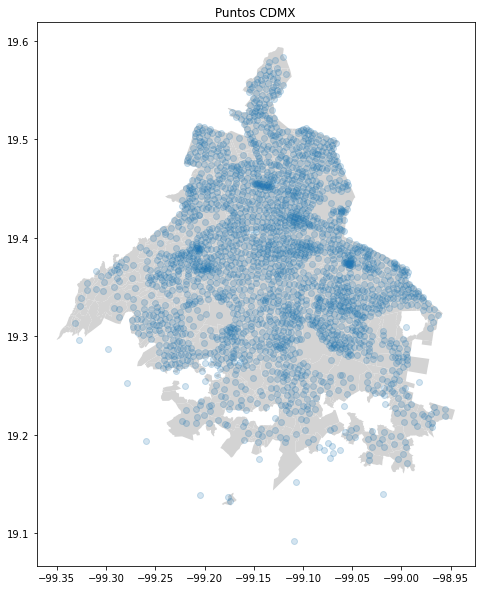

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha = .1 )
ax.set_title('Puntos CDMX')
plt.savefig('Property Map')

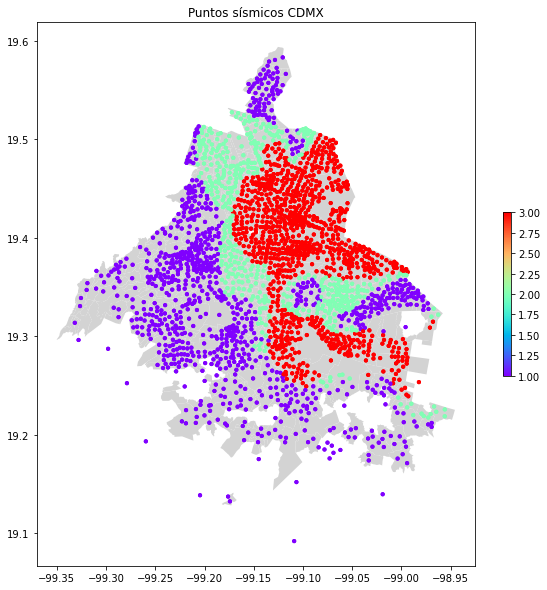

In [14]:
import numpy as np
geo_df['intensidad_1'] = np.where(geo_df.intensidad == 'Muy Alto',3,
                                  np.where(geo_df.intensidad == 'Alto',2,
                                           np.where(geo_df.intensidad == 'Medio',1,0)))
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'intensidad_1', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Puntos sísmicos CDMX')
plt.savefig('Heat Map')

Text(0.5, 1.0, 'Sqft Heatmap')

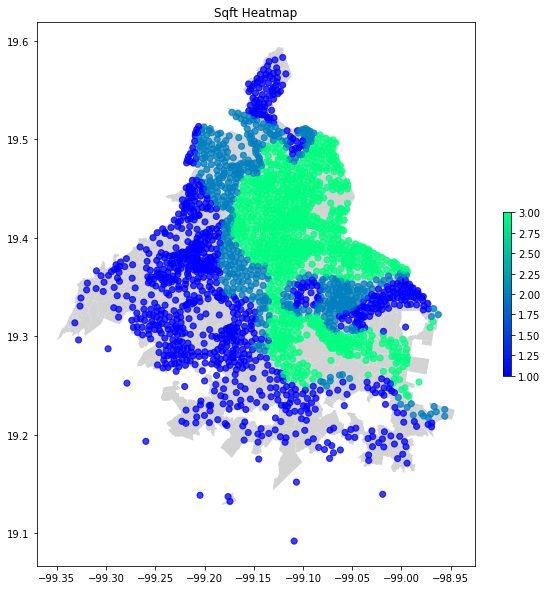

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'intensidad_1', ax=ax, cmap = 'winter',
            legend = True, legend_kwds={'shrink': 0.3},
            alpha = .5)
ax.set_title('Sqft Heatmap')

# Foto Cívicas

In [16]:
url_fotoc = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=04641e2e-8eaa-4637-9f9c-388fc6e683b1&limit=1000'
response_api_fotoc = requests.get(url_fotoc)
data_fotoc = response_api_fotoc.text
dic_fotoc = json.loads(data_fotoc)
results_fotoc = dic_fotoc.get('result')
records_fotoc = results_fotoc.get('records')
zonas_fotoc = pd.DataFrame(records_fotoc)
zonas_fotoc.head()

,_id,id,geo_point_2d,geo_shape,ubi,no,via_princi,ubicacion,sentido,y,x
0,1,0,"19.4056047,-99.1197212","{""type"": ""Point"", ""coordinates"": [-99.11972119...",52,6,Viaducto R?o de la Piedad,Viaducto R?o de la Piedad y 1ro de Mayo,Poniente a Oriente,19.405605,-99.119721
1,2,1,"19.407957,-99.184197","{""type"": ""Point"", ""coordinates"": [-99.184197, ...",3,3,Circuito Bicentenario Maestro Jos? Vasconcelos,Circuito Bicentenario Maestro Jos? Vasconcelos...,Norte a Sur,19.407957,-99.184197
2,3,2,"19.423568,-99.131166","{""type"": ""Point"", ""coordinates"": [-99.131166, ...",2,2,Fray Servando,Escuela M?dico Militar - Jos? Antonio Torres X...,Poniente a Oriente,19.423568,-99.131166
3,4,3,"19.449558,-99.138399","{""type"": ""Point"", ""coordinates"": [-99.138399, ...",27,27,Eje Central,Eje Central L?zaro C?rdenas y Av. Ricardo Flor...,Sur a Norte,19.449558,-99.138399
4,5,4,"19.354244,-99.199933","{""type"": ""Point"", ""coordinates"": [-99.199933, ...",90,44,Perif?rico 2P S-N,Perif?rico 2P S-N / R?o San ?ngel y Rinc. Atla...,Norte a Sur,19.354244,-99.199933


In [23]:
import folium
map = folium.Map(location=[zonas_fotoc.y.mean(), zonas_fotoc.x.mean()], zoom_start=10, control_scale=True)

In [26]:
zonas_fotoc.fillna(0, inplace = True)
for index, location_info in zonas_fotoc.iterrows():
    folium.Marker([location_info["y"], location_info["x"]], popup=location_info["via_princi"]).add_to(map)


In [27]:
map

In [ ]:
map.save('foto.hmtl', )